In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 11.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00a 0:00:01


In [28]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1200], y_digits[:1200]
X_test, y_test = X_digits[1200:], y_digits[1200:]

In [29]:
from sklearn.linear_model import LogisticRegression

n_labeled = 70
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8023450586264657

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

0.916247906197655

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k = n_labeled
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
#X_digits_dist
#X_digits_dist.shape
representative_digit_idx = X_digits_dist.argmin(axis=0)
representative_digit_idx
X_representative_digits = X_train[representative_digit_idx]

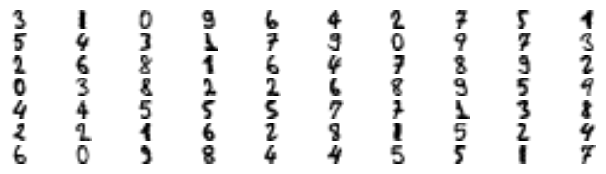

In [32]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [33]:
import numpy as np
y_representative_digits = np.array([
    3, 1, 0, 9, 6, 4, 2, 7, 5, 1,
    5, 4, 3, 1, 7, 9, 0, 9, 7, 3,
    2, 6, 8, 1, 6, 4, 7, 8, 9, 2, 
    0, 3, 8, 2, 2, 6, 8, 9, 5, 9,
    4, 4, 5, 5, 5, 7, 7, 1, 3, 8,
    2, 2, 1, 6, 2, 8, 1, 5, 2, 4, 
    6, 0, 9, 8, 4, 4, 5, 5, 1, 7
])
y_representative_digits = y_train[representative_digit_idx]
print(y_representative_digits)

[3 1 0 9 6 4 2 7 5 1 5 4 3 1 7 9 0 9 7 3 2 6 8 1 6 4 7 8 9 2 0 3 8 2 2 6 8
 9 5 9 4 4 5 5 5 7 7 1 3 8 2 2 1 6 2 8 1 5 2 4 6 0 9 8 4 4 5 5 1 7]


In [34]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8944723618090452

In [35]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10000, n_jobs=100)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.914572864321608

In [36]:
percentile_closest = 95

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [37]:
log_reg = LogisticRegression(max_iter=4000, n_jobs=100)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9212730318257957

In [38]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9793536804308797